In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

In [ ]:
#loading the dataset
df = pd.read_csv('./Liver Patient Dataset (LPD)_train.csv',encoding= 'unicode_escape')

In [ ]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (30691, 11)


In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
# Mapping 'Male' to 1 and 'Female' to 0 in the 'Gender of the patient' column
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})

# No liver disease then:=0 for having liver disease then:=1
df['Result'] = df['Result'].map({1: 1, 2: 0})

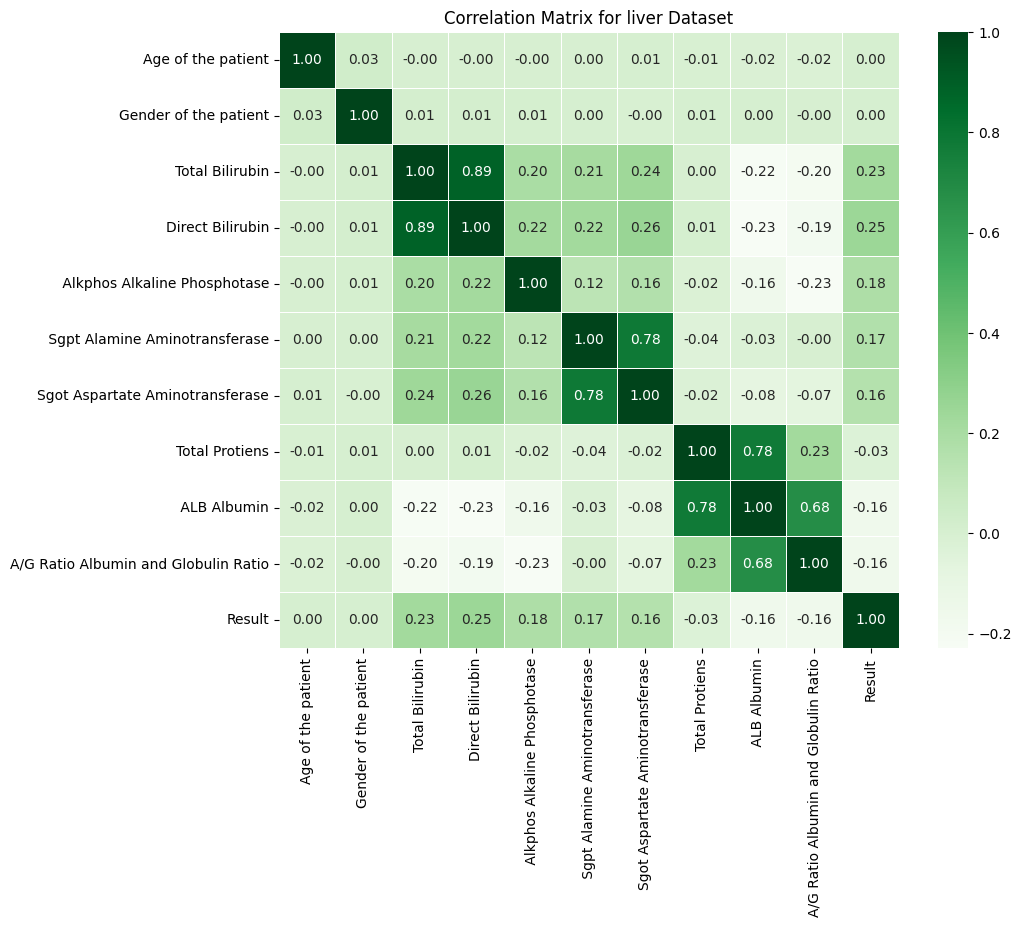

In [ ]:
# Calculateing correlation matrix
corr_matrix = df.corr()

# Ploting the corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for liver Dataset")
plt.show()

In [ ]:
df.isnull().sum()
df= df.dropna()
df.isnull().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
Alkphos Alkaline Phosphotase,0
Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
ALB Albumin,0
A/G Ratio Albumin and Globulin Ratio,0


In [ ]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

In [ ]:
#spliting dataset into train and test
X = df.drop('Result', axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [ ]:
# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
# Print metrics
print(f"Accuracy: {rf_accuracy:}")
print(f"Precision: {rf_precision:}")
print(f"Recall: {rf_recall:}")
print(f"F1 Score: {rf_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, rf_predictions))


Accuracy: 0.9987797437461867
Precision: 0.99915611814346
Recall: 0.99915611814346
F1 Score: 0.99915611814346

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       908
           1       1.00      1.00      1.00      2370

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



In [ ]:
# Random Forest (xgb)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
# Print metrics
print(f"Accuracy: {xgb_accuracy:}")
print(f"Precision: {xgb_precision:}")
print(f"Recall: {xgb_recall:}")
print(f"F1 Score: {xgb_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, xgb_predictions))

Accuracy: 0.9993898718730934
Precision: 0.9991568296795953
Recall: 1.0
F1 Score: 0.9995782370307887

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       908
           1       1.00      1.00      1.00      2370

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



In [ ]:
# Random Forest (knn)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
# Print metrics
print(f"Accuracy: {knn_accuracy:}")
print(f"Precision: {knn_precision:}")
print(f"Recall: {knn_recall:}")
print(f"F1 Score: {knn_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, knn_predictions))

Accuracy: 0.9530201342281879
Precision: 0.9683009298393914
Recall: 0.9666666666666667
F1 Score: 0.9674831081081081

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       908
           1       0.97      0.97      0.97      2370

    accuracy                           0.95      3278
   macro avg       0.94      0.94      0.94      3278
weighted avg       0.95      0.95      0.95      3278



In [ ]:
# Random Forest (svm)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
# Print metrics
print(f"Accuracy: {svm_accuracy:}")
print(f"Precision: {svm_precision:}")
print(f"Recall: {svm_recall:}")
print(f"F1 Score: {svm_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, svm_predictions))

Accuracy: 0.7230018303843807
Precision: 0.7230018303843807
Recall: 1.0
F1 Score: 0.8392351274787535

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       908
           1       0.72      1.00      0.84      2370

    accuracy                           0.72      3278
   macro avg       0.36      0.50      0.42      3278
weighted avg       0.52      0.72      0.61      3278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Random Forest (nb)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
# Print metrics
print(f"Accuracy: {nb_accuracy:}")
print(f"Precision: {nb_precision:}")
print(f"Recall: {nb_recall:}")
print(f"F1 Score: {nb_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, nb_predictions))

Accuracy: 0.5631482611348383
Precision: 0.9643564356435643
Recall: 0.4109704641350211
F1 Score: 0.5763313609467455

Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.96      0.55       908
           1       0.96      0.41      0.58      2370

    accuracy                           0.56      3278
   macro avg       0.67      0.69      0.56      3278
weighted avg       0.80      0.56      0.57      3278



In [ ]:
import pickle
# Create instances of the top 3 models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()

# Create a VotingClassifier with the top 3 models
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('knn', knn_model)],
    voting='hard'  # Use 'hard' voting to let each model vote for the final prediction
)

# Assuming you have your data and labels in X_train, X_test, y_train, y_test
# Fit the voting classifier to the training data
voting_classifier.fit(X_train, y_train)

# Evaluate the voting classifier on the test data
accuracy = voting_classifier.score(X_test, y_test)
print("Ensemble Voting Classifier Accuracy:", accuracy)
with open('voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

print("Voting Classifier saved successfully!")

Ensemble Voting Classifier Accuracy: 0.99908480780964
Voting Classifier saved successfully!


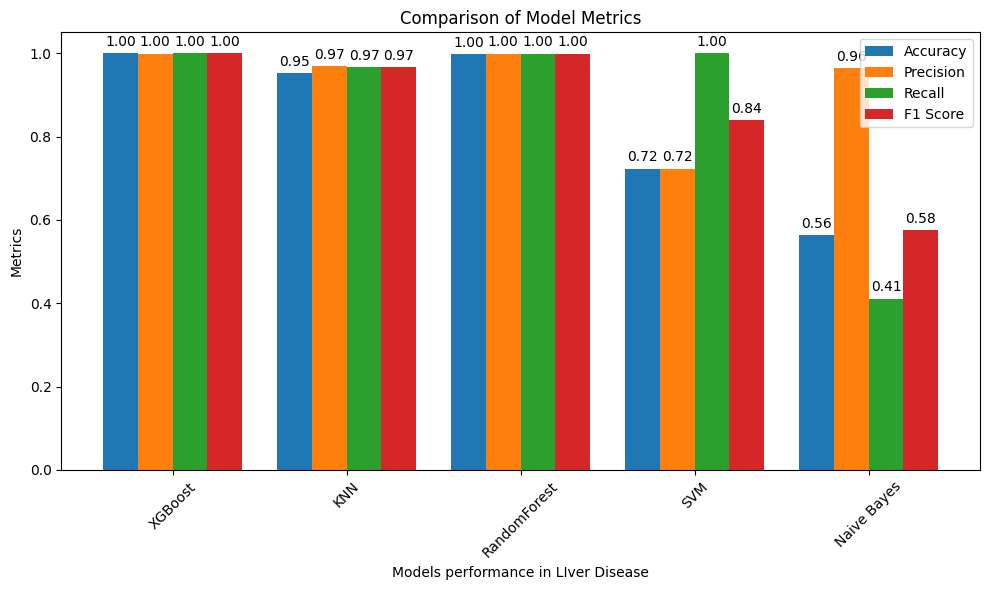

In [ ]:
import matplotlib.pyplot as plt


# Initialize dictionary to store metrics
metrics = {
    "Model": ["XGBoost","KNN","RandomForest","SVM","Naive Bayes"],
    "Accuracy": [xgb_accuracy,knn_accuracy,rf_accuracy,svm_accuracy,nb_accuracy],
    "Precision": [xgb_precision,knn_precision,rf_precision,svm_precision,nb_precision],
    "Recall": [xgb_recall,knn_recall,rf_recall,svm_recall,nb_recall],
    "F1 Score": [xgb_f1,knn_f1,rf_f1,svm_f1,nb_f1]
}


# Convert metrics to NumPy array for plotting
x_labels = metrics["Model"]
accuracy = metrics["Accuracy"]
precision = metrics["Precision"]
recall = metrics["Recall"]
f1 = metrics["F1 Score"]

# Create bar graph
x = np.arange(len(x_labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models performance in LIver Disease')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend()

# Show values on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bars
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


In [9]:
import pickle
import numpy as np

# Step 1: Load the Saved Voting Classifier
with open('voting_classifier_Liver.pkl', 'rb') as file:
    voting_clf = pickle.load(file)

# Step 2: Define Input Data as a NumPy Array
# Example input: Replace these values with actual feature values
# Ensure the number of features matches the model's requirements
input_data = np.array([63,1,0.9,0.2,194,52,45,6,3.9,1.85]).reshape(1, -1)

# Step 3: Make Predictions
try:
    # Predict the label
    predicted_label = voting_clf.predict(input_data)
    print(f"Predicted Label: {predicted_label[0]}")

    # Predict probabilities (if soft voting was used)
    if hasattr(voting_clf, "predict_proba"):
        predicted_probabilities = voting_clf.predict_proba(input_data)
        print(f"Predicted Probabilities: {predicted_probabilities}")
except Exception as e:
    print(f"Error during prediction: {e}")

# Optional: Handle Feature Preprocessing (if required)
# Uncomment and modify if your model requires scaling or encoding for input_data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# input_data = scaler.transform(input_data)  # Apply the same scaler used during training


Predicted Label: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
